# Tests with different learning ratio

In [1]:
import os
os.chdir('..')
os.getcwd()

'c:\\Users\\ChangWeiYueh\\Desktop\\recommendation-cold-start\\Personalized-News-Recommendation-master'

In [2]:
%load_ext autoreload
%autoreload 2
from bandits import *
from evaluator import evaluate
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
%%time
import dataset
files = ("dataset/R6/ydata-fp-td-clicks-v1_020090504","dataset/R6/ydata-fp-td-clicks-v1_020090505")
dataset.get_yahoo_events(files)

10809785 events with 75 articles
Wall time: 21min 28s


In [4]:
_, deploy = evaluate(Egreedy(1))
rnd_ctr = deploy[-1]

Egreedy (ε=1)       0.0383    58.5s


Egreedy (ε=0.1)     0.0619    2.3m
Egreedy (ε=0.1)     0.0631    2.1m
Egreedy (ε=0.1)     0.0611    1.4m
Egreedy (ε=0.1)     0.0594    1.4m


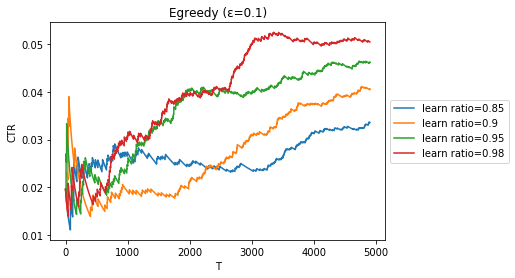

UCB1 (α=0.1)        0.0625    3.2m
UCB1 (α=0.1)        0.0624    3.5m
UCB1 (α=0.1)        0.0645    3.1m
UCB1 (α=0.1)        0.0632    3.1m


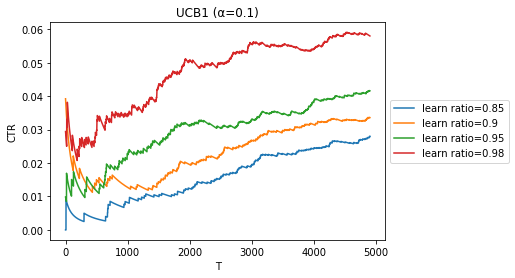

LinUCB (α=0.3, context:both)0.0725    16.3m
LinUCB (α=0.3, context:both)0.0731    17.3m
LinUCB (α=0.3, context:both)0.0747    16.7m
LinUCB (α=0.3, context:both)0.0781    16.5m


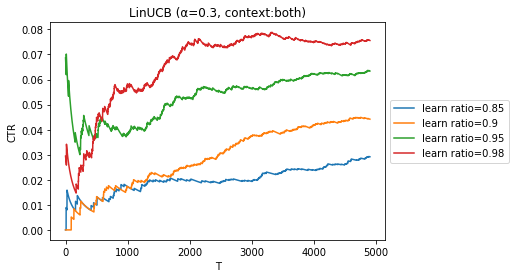

LinUCB (α=0.3, context:user)0.0736    12.0m
LinUCB (α=0.3, context:user)0.0728    12.8m
LinUCB (α=0.3, context:user)0.0702    12.5m
LinUCB (α=0.3, context:user)0.0725    13.4m


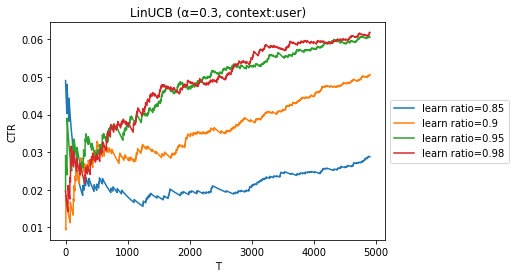

In [5]:
ratio = [0.85,0.9,0.95,0.98]
results = [['Ratio','Bucket','Algorithm','CTR Lift']]

algorithms = [Egreedy(0.1),Ucb1(0.1),LinUCB(0.3,context="both"), LinUCB(0.3,context="user") ]

for test in algorithms:
    for r in ratio:
        learn ,deploy = evaluate(test,size=100,learn_ratio=r)
        results.append([r,'learn',test.algorithm, learn[-1]/rnd_ctr])
        results.append([r,'deploy',test.algorithm, deploy[-1]/rnd_ctr])
        
        plt.plot(deploy[100:5000], label="learn ratio={}".format(r))
        
    plt.title(test.algorithm)
    plt.xlabel("T")
    plt.ylabel("CTR")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()